In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("C:/Users/96655/Desktop/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Univariate Analysis
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

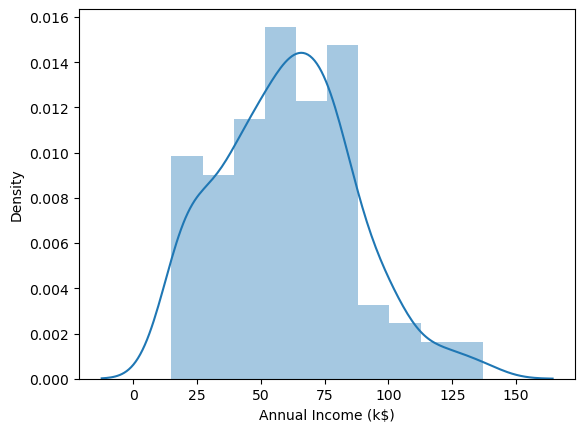

In [5]:
sns.distplot(df['Annual Income (k$)'])

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

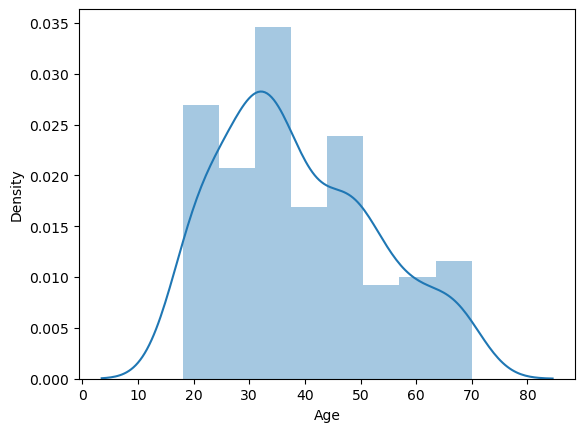

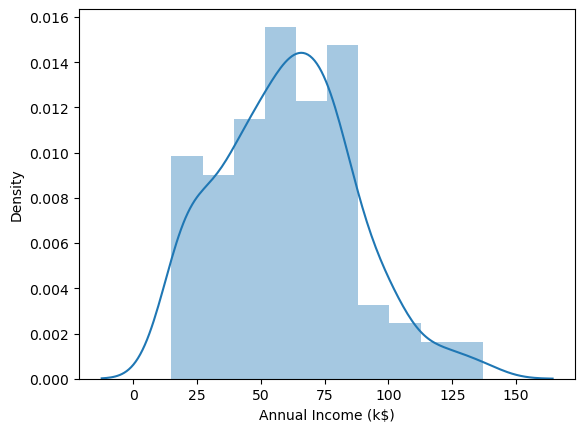

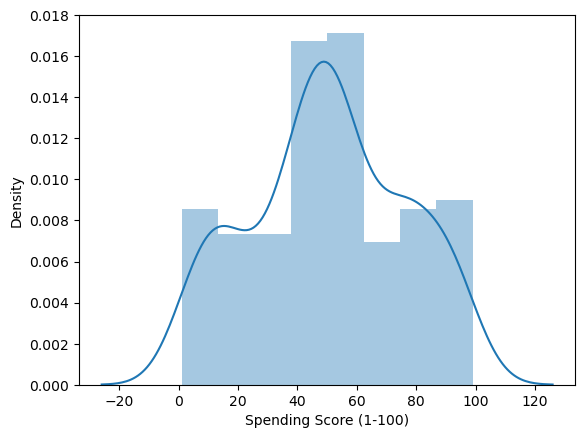

In [7]:
columns = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

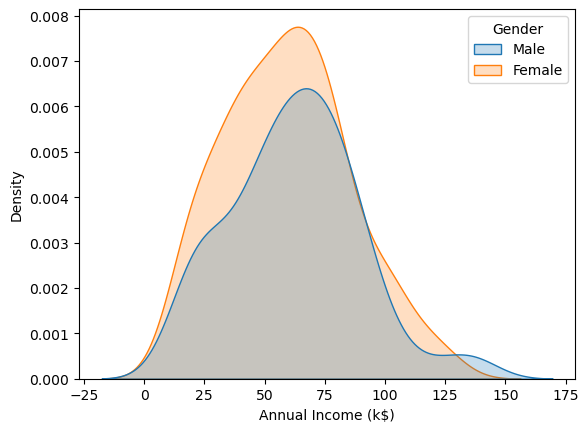

In [8]:
sns.kdeplot(df['Annual Income (k$)'], shade= True, hue=df['Gender']);

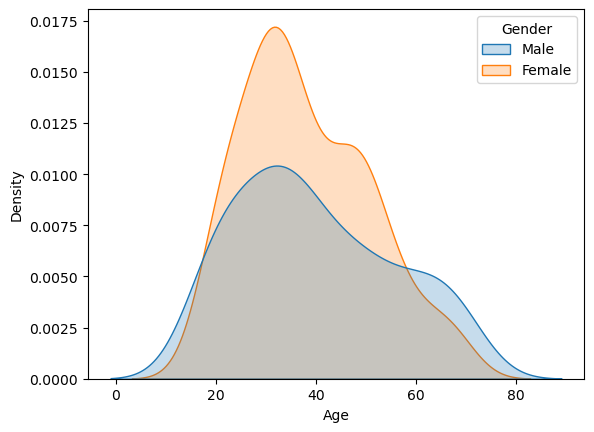

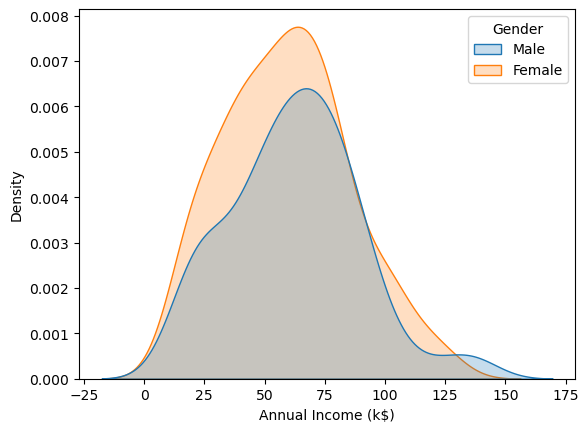

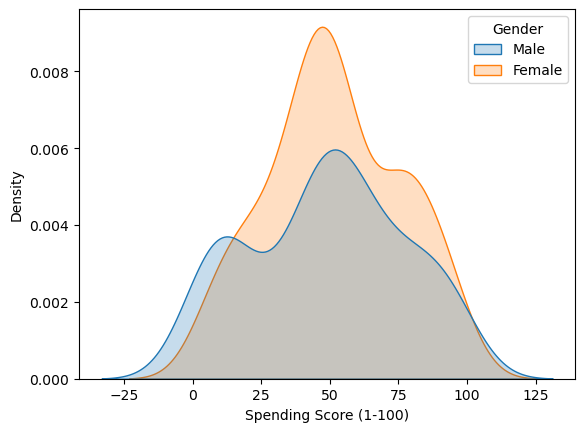

In [9]:
columns = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade= True, hue=df['Gender'])

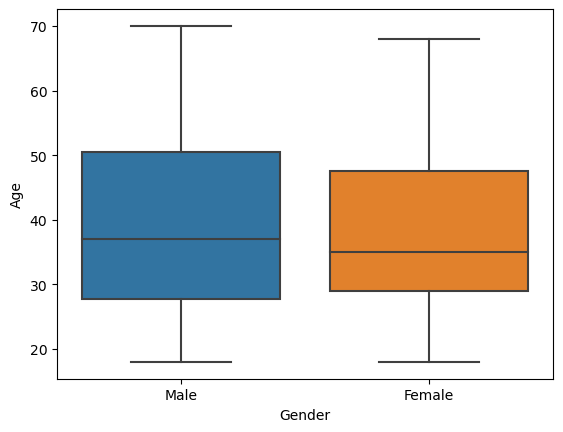

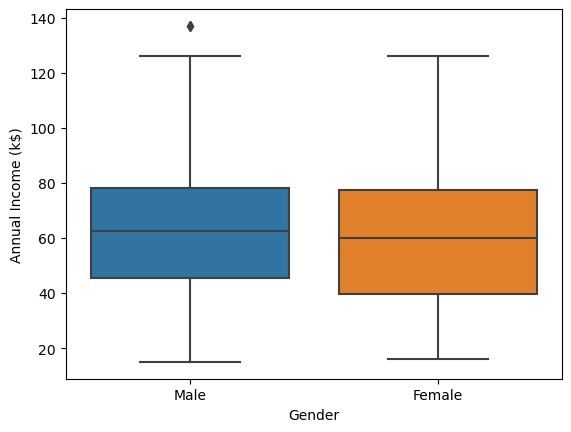

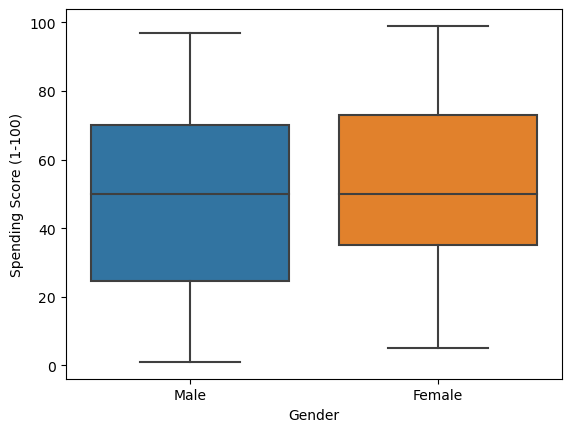

In [10]:
columns = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [11]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

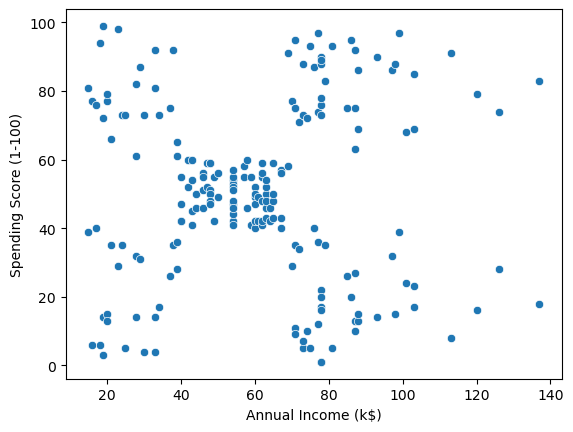

In [12]:
#Bivariate Analysis

sns.scatterplot(data=df, x='Annual Income (k$)', y= 'Spending Score (1-100)')

In [13]:
df.groupby (['Gender']) ['Age','Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
df=df.drop('CustomerID',axis=1)
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

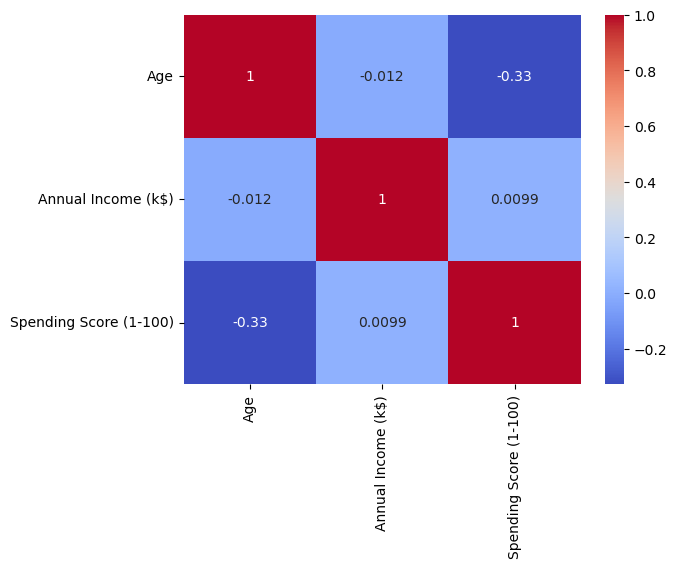

In [15]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [17]:
#Clustering-Univariate, Bivariate and Multivariate Analysis

clustering1= KMeans(n_clusters=3)

In [18]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [19]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [21]:
df["Income Cluster"].value_counts()

2    92
1    72
0    36
Name: Income Cluster, dtype: int64

In [22]:
clustering1.inertia_

23528.152173913044

In [74]:
df.groupby('Income Cluster')['Age','Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,39.184783,66.717391,50.054348
2,37.833333,99.888889,50.638889


In [39]:
# Bivariate Clustering

clustering2= KMeans()
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,0
2,Female,20,16,6,1,3
3,Female,23,16,77,1,0
4,Female,31,17,40,1,3


In [44]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns =['x','y']

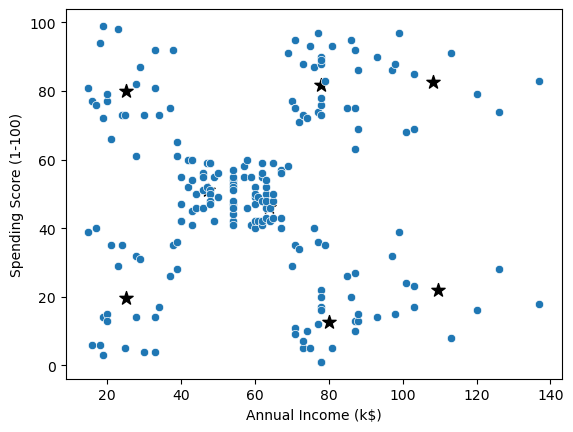

In [45]:
plt.scatter(x=centers['x'],y=centers['y'], s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
hue='Spending and Income Cluster'

In [49]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.571429,0.428571
1,0.595238,0.404762
2,0.535714,0.464286
3,0.619048,0.380952
4,0.700000,0.300000
5,0.318182,0.681818
6,0.600000,0.400000
7,0.545455,0.454545


In [50]:
df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.333333,25.095238,80.047619
1,41.571429,63.952381,46.214286
2,32.785714,78.035714,81.892857
3,44.142857,25.142857,19.523810
4,41.000000,109.700000,22.000000
5,41.000000,80.181818,12.681818
6,43.955556,47.444444,51.244444
7,32.454545,108.181818,82.727273


In [55]:
# Multivariate Clustering
from sklearn.preprocessing import StandardScaler

In [56]:
scale = StandardScaler()

In [59]:
dff= pd.get_dummies(df,drop_first=True)
dff.head

<bound method NDFrame.head of      Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0     19                  15                      39               1   
1     21                  15                      81               1   
2     20                  16                       6               1   
3     23                  16                      77               1   
4     31                  17                      40               1   
..   ...                 ...                     ...             ...   
195   35                 120                      79               0   
196   45                 126                      28               0   
197   32                 126                      74               0   
198   32                 137                      18               0   
199   30                 137                      83               0   

     Spending and Income Cluster  Gender_Male  
0                              3            1  
1        

In [60]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [61]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [62]:
dff=scale.fit_transform(dff)

In [63]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,0
2,Female,20,16,6,1,3
3,Female,23,16,77,1,0
4,Female,31,17,40,1,3
...,...,...,...,...,...,...
195,Female,35,120,79,0,7
196,Female,45,126,28,0,4
197,Male,32,126,74,0,7
198,Male,32,137,18,0,4


In [64]:
df.to_csv('Clustering.csv')